In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
dados_conexao = (
    "Driver={SQL Server};"
    "Server=DESKTOP-2K9QLKU\SQLSERVER;"
    "Database=AdventureWorksDW2022;"
)
conexao = pyodbc.connect(dados_conexao)
print("Conexao bem sucedida")

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_70156\2099273098.py:8: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-2K9QLKU\SQLSERVER;"


Conexao bem sucedida


In [2]:
codigo_sql = """
WITH VendasMensais AS (
    SELECT 
        FORMAT(OrderDate, 'yyyy-MM') AS MesAno,
        SUM(SalesAmount) AS TotalVendas        
    FROM FactInternetSales
    WHERE OrderDate <= '20140128'            
    GROUP BY FORMAT(OrderDate, 'yyyy-MM')       
)
SELECT 
    MesAno,            
    TotalVendas        
FROM VendasMensais
ORDER BY MesAno;
"""

dados = pd.read_sql(codigo_sql, conexao)
conexao.close()

C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_70156\314040140.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql(codigo_sql, conexao)


In [3]:
print(dados.head())

    MesAno  TotalVendas
0  2010-12   43421.0364
1  2011-01  469823.9148
2  2011-02  466334.9030
3  2011-03  485198.6594
4  2011-04  502073.8458


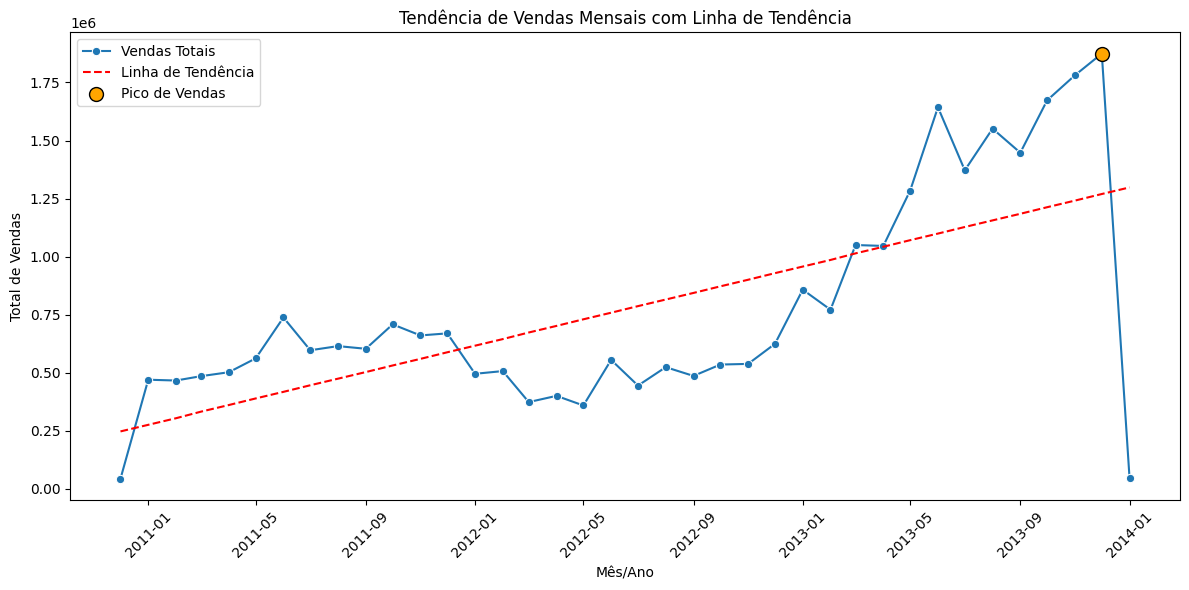

In [5]:
dados['MesAno'] = pd.to_datetime(dados['MesAno'], format='%Y-%m')

plt.figure(figsize=(12, 6))
sns.lineplot(x='MesAno', y='TotalVendas', data=dados, marker='o', label='Vendas Totais')

slope, intercept, r_value, p_value, std_err = stats.linregress(dados.index, dados['TotalVendas'])
trend_line = slope * dados.index + intercept
plt.plot(dados['MesAno'], trend_line, color='red', linestyle='--', label='Linha de Tendência')

max_vendas = dados['TotalVendas'].max()
max_vendas_meses = dados[dados['TotalVendas'] == max_vendas]
plt.scatter(max_vendas_meses['MesAno'], max_vendas_meses['TotalVendas'], color='orange', s=100, edgecolor='black', zorder=5, label='Pico de Vendas')

plt.title('Tendência de Vendas Mensais com Linha de Tendência')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Vendas')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()  


plt.show()
